In [83]:
import warnings
warnings.filterwarnings("ignore")
import pickle
import numpy as np
import re
import pandas as pd
from tqdm import tqdm
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
from string import punctuation
import matplotlib.pyplot as plt
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing  import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
df_train=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/df_train.pkl','rb'))


In [85]:
df_train.shape

(18285, 27)

In [86]:
df_train.head()

,id,title,author,text,label,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,...,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text,cleaned_text,cleaned_title,Without_Stopwords_text,Without_Stopwords_title
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,81,4930,19,943,1,...,19.0,25.486486,0.105263,0.386002,0.947368,0.441145,house dem aide we did not even see comey s let...,house dem aide we did not even see comey s let...,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,55,4160,11,822,1,...,11.0,28.344828,0.090909,0.371046,1.000000,0.486618,ever get the feeling your life circles the rou...,flynn hillary clinton big woman on campus brei...,ever get feeling life circles roundabout rathe...,flynn hillary clinton big woman campus breitbart
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,33,7692,7,1454,1,...,7.0,28.509804,0.142857,0.359697,1.000000,0.416781,why the truth might get you fired october the ...,why the truth might get you fired,truth might get fired october tension intellig...,truth might get fired
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,63,3237,10,612,1,...,10.0,22.666667,0.000000,0.352941,1.000000,0.436275,videos civilians killed in single us airstrike...,civilians killed in single us airstrike have b...,videos civilians killed single us airstrike id...,civilians killed single us airstrike identified
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,93,938,14,177,1,...,14.0,35.400000,0.285714,0.344633,0.857143,0.587571,print an iranian woman has been sentenced to s...,iranian woman jailed for fictional unpublished...,print iranian woman sentenced six years prison...,iranian woman jailed fictional unpublished sto...


> # Extracting independent features on X and Class label to Y variable

In [87]:
Y=df_train["label"]
X=df_train.drop(["id","title","text","label","cleaned_text","cleaned_title","author"], axis=1, inplace=False)

In [88]:
X.shape,Y.shape

((18285, 20), (18285,))

> # Splitting the dataset to train and test dataset

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y,random_state=42)

In [90]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13713, 20) (13713,)
(4572, 20) (4572,)


In [91]:
X_train.head(1)

,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,num_sentences_text,Count_unique_words_title,Count_unique_words_text,Count_Stop_words_title,Count_Stop_words_text,Avg_word_length_title,Avg_word_length_text,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text,Without_Stopwords_text,Without_Stopwords_title
8682,69,287,10,42,1,2,10,36,3,12,6.9,6.833333,10.0,21.0,0.3,0.285714,1.0,0.857143,next swipe left right important question scunt...,important question scunthorpe hospital compute...


> # Extracting numberical features from train andtest dataset

In [92]:
X_train_Num_Ft=X_train.drop(["Without_Stopwords_text","Without_Stopwords_title"],axis=1,inplace=False)
X_test_Num_Ft=X_test.drop(["Without_Stopwords_text","Without_Stopwords_title"],axis=1,inplace=False)

In [93]:
X_train_Num_Ft.shape,X_test_Num_Ft.shape

((13713, 18), (4572, 18))

In [94]:
X_train_Num_Ft.head(1)

,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,num_sentences_text,Count_unique_words_title,Count_unique_words_text,Count_Stop_words_title,Count_Stop_words_text,Avg_word_length_title,Avg_word_length_text,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text
8682,69,287,10,42,1,2,10,36,3,12,6.9,6.833333,10.0,21.0,0.3,0.285714,1.0,0.857143


In [95]:
X_test_Num_Ft.head(1)

,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,num_sentences_text,Count_unique_words_title,Count_unique_words_text,Count_Stop_words_title,Count_Stop_words_text,Avg_word_length_title,Avg_word_length_text,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text
9013,48,2475,7,477,1,13,7,199,1,155,6.857143,5.188679,7.0,36.692308,0.142857,0.324948,1.0,0.417191


> # Standardization of 18 numerical Manually engineered features

In [96]:
from sklearn.preprocessing  import StandardScaler
Std_Scaler=StandardScaler()
X_train_Num_Std=Std_Scaler.fit_transform(X_train_Num_Ft)
X_test_Num_Std=Std_Scaler.transform(X_test_Num_Ft)

> # Pickle tthe standard scaler object for standardization of test dataset

In [97]:
pickle.dump(Std_Scaler,open("./Std_Scaler.pkl",'wb'))

In [98]:
X_train_Num_Std.shape,X_test_Num_Std.shape

((13713, 18), (4572, 18))

In [99]:
X_train_Num_Std

array([[-0.25042064, -0.86483222, -0.88363495, ..., -0.68191916,
         0.58227813,  2.78435809],
       [ 0.32519972, -0.11495737,  0.98084975, ..., -0.03588199,
         0.58227813, -0.40221243],
       [ 0.23664274, -0.12338293, -0.26214005, ...,  0.31702932,
         0.58227813, -0.0891202 ],
       ...,
       [ 0.67942764, -0.88934294,  0.56651982, ...,  1.09183384,
         0.58227813,  2.91913599],
       [ 0.36947821,  0.60600249,  0.35935485, ...,  0.16318966,
        -0.61005025, -0.6306165 ],
       [ 0.28092123, -0.35221348,  0.35935485, ...,  0.09751571,
         0.58227813, -0.07937207]])

In [100]:
X_test_Num_Std

array([[-1.18026892, -0.4458521 , -1.50512985, ..., -0.10457833,
         0.58227813, -0.5362078 ],
       [ 0.59087066, -0.2560855 , -0.26214005, ...,  0.2049075 ,
         0.58227813, -0.08872233],
       [ 0.0152503 ,  0.35361867,  0.15218988, ..., -0.31335738,
        -0.68953881,  0.02916915],
       ...,
       [ 0.4137567 ,  1.07457853,  0.15218988, ..., -0.4009486 ,
         0.58227813, -0.61152672],
       [ 0.05952879, -0.66951242,  0.15218988, ..., -0.50539638,
         0.58227813,  0.83779477],
       [-0.64892705, -0.47687348, -1.09079992, ...,  0.65402768,
         0.58227813,  0.22454754]])

> # Vectorizing our text features using tfidf vectorizer

In [101]:
vectorizer_title_tfidf =TfidfVectorizer(max_features=3500)
vectorizer_title_tfidf.fit(X_train["Without_Stopwords_title"].values)

# we use the fitted tfidfVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer_title_tfidf.transform(X_train['Without_Stopwords_title']).toarray()
X_test_title_tfidf = vectorizer_title_tfidf.transform(X_test['Without_Stopwords_title']).toarray()

print("After vectorizations shape of train and test data")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations shape of train and test data
(13713, 3500) (13713,)
(4572, 3500) (4572,)


In [102]:
vectorizer_text_tfidf =TfidfVectorizer(max_features=4500)
vectorizer_text_tfidf.fit(X_train["Without_Stopwords_text"].values)

# we use the fitted countVectorizer to convert the text to vector
X_train_text_tfidf = vectorizer_text_tfidf.transform(X_train['Without_Stopwords_text'].values).toarray()
X_test_text_tfidf = vectorizer_text_tfidf.transform(X_test['Without_Stopwords_text'].values).toarray()

print("After vectorizations shape of train and test data")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations shape of train and test data
(13713, 4500) (13713,)
(4572, 4500) (4572,)


In [103]:
# stacking all the features for train and test dataset 
X_train_final_tfidf = np.hstack((X_train_title_tfidf, X_train_text_tfidf,X_train_Num_Std))
X_test_final_tfidf = np.hstack((X_test_title_tfidf , X_test_text_tfidf,X_test_Num_Std))

print("Final Data matrix")
print(X_train_final_tfidf.shape, y_train.shape)
print(X_test_final_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix
(13713, 8018) (13713,)
(4572, 8018) (4572,)


> # Pickle the vectorizer object for test dataset

In [104]:
pickle.dump(vectorizer_title_tfidf,open("./vectorizer_title_tfidf.pkl",'wb'))
pickle.dump(vectorizer_text_tfidf,open("./vectorizer_text_tfidf.pkl",'wb'))

> # Preparing the test dataset for prediction from above tunned model

In [105]:
df_test=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/df_test.pkl','rb'))

In [106]:
df_test.shape

(5200, 26)

In [107]:
df_test.head(2)

,id,title,author,text,num_characters_title,num_characters_text,num_word_title,num_word_text,num_sentences_title,num_sentences_text,...,Avg_sentence_length_title,Avg_sentence_length_text,Stopword_count_ratio_title,Stopword_count_ratio_text,Unique_words_count_ratio_title,Unique_words_count_ratio_text,cleaned_text,cleaned_title,Without_Stopwords_text,Without_Stopwords_title
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",94,8015,19,1588,1,76,...,19.0,20.894737,0.157895,0.309194,0.947368,0.399874,palo alto calif after years of scorning the po...,specter of trump loosens tongues if not purse ...,palo alto calif years scorning political proce...,specter trump loosens tongues purse strings si...
1,20801,Russian warships ready to strike terrorists ne...,David Streitfeld,Russian warships ready to strike terrorists ne...,55,1559,8,277,1,10,...,8.0,27.700000,0.125000,0.314079,1.000000,0.512635,russian warships ready to strike terrorists ne...,russian warships ready to strike terrorists ne...,russian warships ready strike terrorists near ...,russian warships ready strike terrorists near ...


In [108]:
df_test_final=df_test.drop(["id","title","text","cleaned_text","cleaned_title","author"], axis=1, inplace=False)

In [109]:
df_test_final.shape

(5200, 20)

In [110]:
df_test_Num_Ft=df_test_final.drop(["Without_Stopwords_text","Without_Stopwords_title"],axis=1,inplace=False)

In [111]:
df_test_Num_Ft.shape

(5200, 18)

In [112]:
Std_Scaler=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/Std_Scaler.pkl','rb'))

In [113]:
df_test_Num_Std=Std_Scaler.transform(df_test_Num_Ft)

In [114]:
df_test_Num_Std

array([[ 0.85654159,  0.61500252,  0.98084975, ..., -0.3364022 ,
        -0.42178787, -0.66690683],
       [-0.87031949, -0.62125694, -1.29796488, ..., -0.26450971,
         0.58227813,  0.18416632],
       [ 0.4137567 , -0.04908481,  0.35935485, ..., -0.36811604,
         0.58227813, -0.1585109 ],
       ...,
       [-0.16186366,  0.16825634,  0.56651982, ..., -0.43060595,
        -0.53991328,  0.08880001],
       [-0.78176251, -0.41540519, -0.67646998, ...,  0.94602397,
        -1.15201769,  0.10414058],
       [-1.09171194,  0.70787517, -0.67646998, ...,  0.37148373,
         0.58227813, -0.81559203]])

In [115]:
vectorizer_text_tfidf=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/vectorizer_text_tfidf.pkl','rb'))
vectorizer_title_tfdf=pickle.load(open('../input/fake-news-case-study-preprocessed-daa/vectorizer_title_tfidf.pkl','rb'))

# Vectorizing the test dataset text feaures

In [116]:
df_test_title_tfidf = vectorizer_title_tfdf.transform(df_test_final['Without_Stopwords_title'].values).toarray()
df_test_text_tfidf = vectorizer_text_tfidf.transform(df_test_final['Without_Stopwords_text'].values).toarray()
print("After vectorizations shape test data")
print(df_test_title_tfidf.shape)
print(df_test_text_tfidf.shape)
print("="*100)

After vectorizations shape test data
(5200, 3500)
(5200, 4500)


In [117]:
# stacking all the features for train and test dataset
df_test_final = np.hstack((df_test_title_tfidf, df_test_text_tfidf,df_test_Num_Std))

print("Final test Data matrix")
print(df_test_final.shape)
print("="*100)

Final test Data matrix
(5200, 8018)


# Hyperparameter tunning for Gaussian NB

In [118]:
from sklearn.model_selection import GridSearchCV
parameters = {'var_smoothing':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1.0,5.0,10.0,50.0,100.0]}
gnb_grid = GridSearchCV(GaussianNB(), param_grid=parameters, n_jobs=-1, cv=3,scoring='accuracy',return_train_score=True)
gnb_grid.fit(X_train_final_tfidf,y_train)
print('Train Accuracy : %.3f'%gnb_grid.best_estimator_.score(X_train_final_tfidf, y_train))
print('Test Accuracy : %.3f'%gnb_grid.best_estimator_.score(X_test_final_tfidf, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gnb_grid.best_score_)
print('Best Parameters : ',gnb_grid.best_params_)

Train Accuracy : 0.912
Test Accuracy : 0.900
Best Accuracy Through Grid Search : 0.893
Best Parameters :  {'var_smoothing': 0.005}


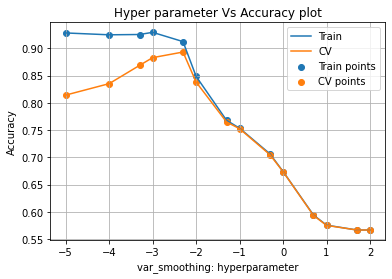

In [119]:
from math import log
results = pd.DataFrame.from_dict(gnb_grid.cv_results_)
results = results.sort_values(['param_var_smoothing'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
var_smoothing =  results['param_var_smoothing']

var_smoothing=[log(y,10) for y in var_smoothing]

plt.plot(var_smoothing, train_auc, label='Train')

plt.plot(var_smoothing, cv_auc, label='CV')

plt.scatter(var_smoothing, train_auc, label='Train points')
plt.scatter(var_smoothing, cv_auc, label='CV points')


plt.legend()
plt.xlabel("var_smoothing: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()
plt.show()

# Training the GNB on best hyperparameter

In [120]:
gnb = GaussianNB(var_smoothing=0.005)
gnb.fit(X_train_final_tfidf,y_train)
y_pred = gnb.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Gaussin NB accuracy on test dataset :",accuracy)
print("Gaussin NB precision on test dataset:",precision)

Gaussin NB accuracy on test dataset : 0.9000437445319335
Gaussin NB precision on test dataset: 0.9214601769911505


> # Predcting on test dataset using Fine tunned Gaussian Naive Bayes Model

In [121]:
y_test_pred_gnb = gnb.predict(df_test_final)

In [122]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_gnb.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

# Below is Kaggle private and public score:-

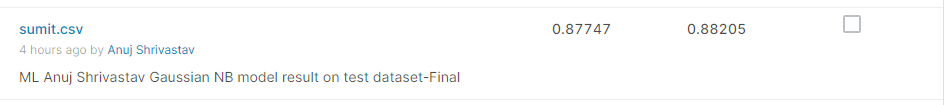

> # Logistic regression hyperparameter tunning

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameters = {'penalty':['l1','l2'],
             'C':[1,3,5,8,10,15,20]}
LR_grid = GridSearchCV(LogisticRegression(solver='liblinear',random_state=12), param_grid=parameters, n_jobs=-1, cv=3,scoring='accuracy',return_train_score=True)
LR_grid.fit(X_train_final_tfidf,y_train)

print('Train Accuracy : %.3f'%LR_grid.best_estimator_.score(X_train_final_tfidf, y_train))
print('Test Accuracy : %.3f'%LR_grid.best_estimator_.score(X_test_final_tfidf, y_test))
print('Best Accuracy Through Grid Search : %.3f'%gnb_grid.best_score_)
print('Best Parameters : ',LR_grid.best_params_)

Train Accuracy : 1.000
Test Accuracy : 0.983
Best Accuracy Through Grid Search : 0.893
Best Parameters :  {'C': 20, 'penalty': 'l1'}


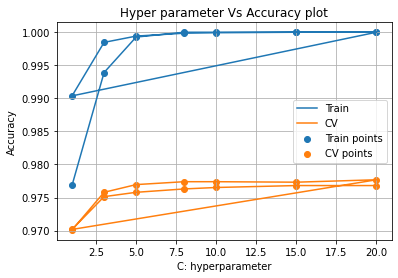

In [124]:
results = pd.DataFrame.from_dict(LR_grid.cv_results_)
results = results.sort_values(['param_penalty'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']

plt.plot(C, train_auc, label='Train')

plt.plot(C, cv_auc, label='CV')

plt.scatter(C, train_auc, label='Train points')
plt.scatter(C, cv_auc, label='CV points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()
plt.show()

# Training the LR on best hyperparameter

In [125]:
LR = LogisticRegression(penalty='l1',C=20,random_state=10,solver='liblinear')
LR.fit(X_train_final_tfidf,y_train)
y_pred = LR.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("LR accuracy on test dataset :",accuracy)
print("LR precision on test dataset :",precision)

LR accuracy on test dataset : 0.9825021872265967
LR precision on test dataset : 0.9769192172604114


> # prediction on test dataset

In [126]:
y_test_pred_LR = LR.predict(df_test_final)

In [127]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_LR.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

In [128]:
pickle.dump(LR,open("./Logistic_reg.pkl",'wb'))

# Below is Kaggle private and public score:-

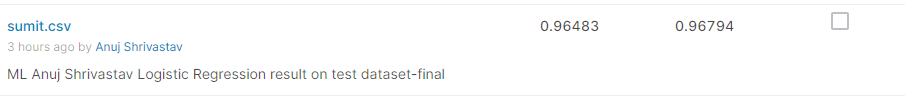

> # Xgboost Hyperparameter tunning

In [135]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
Param_dict={"max_depth":[2,5,8],
"n_estimators":[8,10,15,20,25,30]}
GBDT_grid = GridSearchCV(XGBClassifier(random_state=23,eval_metric='logloss'), param_grid=Param_dict, n_jobs=-1, cv=3,scoring='accuracy' ,return_train_score=True)
GBDT_grid.fit(X_train_final_tfidf,y_train)

print('Train Accuracy : %.3f'%GBDT_grid.best_estimator_.score(X_train_final_tfidf, y_train))
print('Test Accuracy : %.3f'%GBDT_grid.best_estimator_.score(X_test_final_tfidf, y_test))
print('Best Accuracy Through Grid Search : %.3f'%GBDT_grid.best_score_)
print('Best Parameters : ',GBDT_grid.best_params_)

Train Accuracy : 0.999
Test Accuracy : 0.979
Best Accuracy Through Grid Search : 0.978
Best Parameters :  {'max_depth': 8, 'n_estimators': 30}


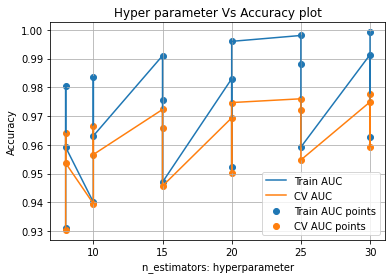

In [136]:
results = pd.DataFrame.from_dict(GBDT_grid.cv_results_)
results = results.sort_values(['param_n_estimators'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
n_estimators =  results['param_n_estimators']

plt.plot(n_estimators, train_auc, label='Train AUC')

plt.plot(n_estimators, cv_auc, label='CV AUC')

plt.scatter(n_estimators, train_auc, label='Train AUC points')
plt.scatter(n_estimators, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("n_estimators: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()
plt.show()

# Training the XGBoost on best hyperparameter

In [137]:
GBDT = XGBClassifier(max_depth=8,n_estimators= 30,random_state=12)
GBDT.fit(X_train_final_tfidf,y_train)
y_pred = GBDT.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Xgboost accuracy on testdata set :",accuracy)
print("Xgboost precision on testdata set :",precision)

Xgboost accuracy on testdata set : 0.9794400699912511
Xgboost precision on testdata set : 0.9622733953944145


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# predicting  on test data

In [138]:
y_test_pred_GBDT = GBDT.predict(df_test_final)

In [139]:
y_test_pred_GBDT

array([0, 1, 1, ..., 0, 1, 0])

In [140]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_GBDT.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

# Below is Kaggle private and public score:-

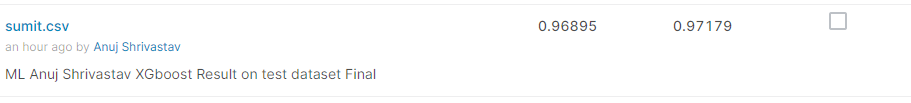

In [141]:
pickle.dump(GBDT,open("./XGboost_GBDT.pkl",'wb'))

> # Decision tree Classifier Hyperparameter tunning

In [142]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,5,8,10,15,18,20,25,30,None]}
DT_grid = GridSearchCV(DecisionTreeClassifier(random_state=12), param_grid=parameters, n_jobs=-1, cv=3,scoring='accuracy',return_train_score=True)
DT_grid.fit(X_train_final_tfidf,y_train)

print('Train Accuracy : %.3f'%DT_grid.best_estimator_.score(X_train_final_tfidf, y_train))
print('Test Accuracy : %.3f'%DT_grid.best_estimator_.score(X_test_final_tfidf, y_test))
print('Best Accuracy Through Grid Search : %.3f'%DT_grid.best_score_)
print('Best Parameters : ',DT_grid.best_params_)

Train Accuracy : 0.989
Test Accuracy : 0.953
Best Accuracy Through Grid Search : 0.951
Best Parameters :  {'max_depth': 18}


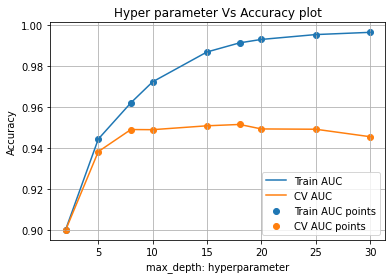

In [143]:
results = pd.DataFrame.from_dict(DT_grid.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']

plt.plot(max_depth, train_auc, label='Train AUC')

plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()
plt.show()

# Training the Decision tree on best hyperparameter

In [144]:
DT = DecisionTreeClassifier(max_depth=18,random_state=12)
DT.fit(X_train_final_tfidf,y_train)
y_pred = DT.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Decision Tree accuracy on testdata set :",accuracy)
print("Decision Tree precision on testdata set :",precision)

Decision Tree accuracy on testdata set : 0.9525371828521435
Decision Tree precision on testdata set : 0.9357707509881423


In [145]:
y_test_pred_DT = DT.predict(df_test_final)

In [146]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_DT.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

# Below is Kaggle private and public score:-

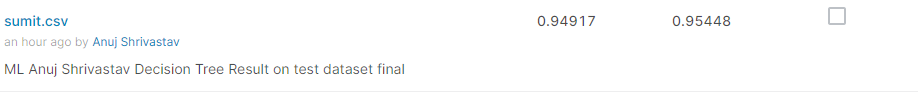

# Lightbm Classifier hyperparameter tunning

In [156]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,5,8,10,15,18,20,25,30,None]}
lgbm_grid = GridSearchCV(LGBMClassifier(random_state=12), param_grid=parameters, n_jobs=-1, cv=3,scoring='accuracy',return_train_score=True)
lgbm_grid.fit(X_train_final_tfidf,y_train)

print('Train Accuracy : %.3f'%lgbm_grid.best_estimator_.score(X_train_final_tfidf, y_train))
print('Test Accuracy : %.3f'%lgbm_grid.best_estimator_.score(X_test_final_tfidf, y_test))
print('Best Accuracy Through Grid Search : %.3f'%lgbm_grid.best_score_)
print('Best Parameters : ',lgbm_grid.best_params_)

Train Accuracy : 1.000
Test Accuracy : 0.986
Best Accuracy Through Grid Search : 0.981
Best Parameters :  {'max_depth': 20}


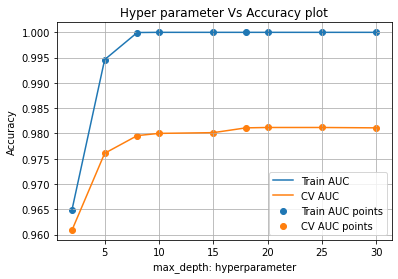

In [157]:
results = pd.DataFrame.from_dict(lgbm_grid.cv_results_)
results = results.sort_values(['param_max_depth'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
max_depth =  results['param_max_depth']

plt.plot(max_depth, train_auc, label='Train AUC')

plt.plot(max_depth, cv_auc, label='CV AUC')

plt.scatter(max_depth, train_auc, label='Train AUC points')
plt.scatter(max_depth, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("max_depth: hyperparameter")
plt.ylabel("Accuracy")
plt.title("Hyper parameter Vs Accuracy plot")
plt.grid()
plt.show()

# Training the XGBoost on best hyperparameter

In [158]:
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier(random_state=12,max_depth=20)
clf_lgbm.fit(X_train_final_tfidf, y_train)
y_pred = clf_lgbm.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("lightGBM accuracy on testdata set :",accuracy)
print("lightGBM precision on testdata set :",precision)

lightGBM accuracy on testdata set : 0.9855643044619422
lightGBM precision on testdata set : 0.9719073435189749


In [159]:
y_test_pred_clf_lgbm = clf_lgbm.predict(df_test_final)

In [160]:
y_test_pred_clf_lgbm

array([0, 1, 1, ..., 0, 1, 0])

In [161]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_clf_lgbm.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

In [162]:
pickle.dump(clf_lgbm,open("./clf_lgbm.pkl",'wb'))

# Below is Kaggle private and public score:-

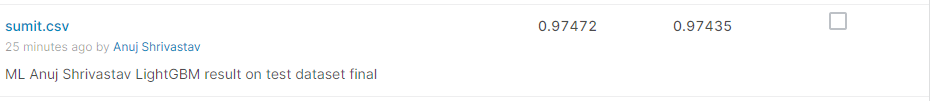

> # Voting classifier hyperparameter tunning
     using below model as esitmator 
1. XGboost
2. Logistic regression
3. LightGBM classifier

In [163]:
from sklearn.ensemble import VotingClassifier
xgb = XGBClassifier(max_depth=8,n_estimators= 30,eval_metric='logloss',random_state=12)
lr = LogisticRegression(penalty='l1',C=20,random_state=10,solver='liblinear')
lgbm = LGBMClassifier(random_state=12,max_depth=20)
voting = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr), ('lgbm', lgbm)],voting='soft')

In [164]:
voting.fit(X_train_final_tfidf,y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            eval_metric='logloss', gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=8,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=30, n_jobs=None,
                                            num_parallel_tree=None,
                 

In [166]:
y_pred = voting.predict(X_test_final_tfidf)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
print("Voting classifier accuracy on testdata set :",accuracy)
print("Voting classifier  precision on testdata set :",precision)

Voting classifier accuracy on testdata set : 0.9860017497812773
Voting classifier  precision on testdata set : 0.9738012852199703


In [167]:
y_test_pred_voting = voting.predict(df_test_final)

In [168]:
y_test_pred_voting

array([0, 1, 1, ..., 0, 1, 0])

In [169]:
my_submission = pd.DataFrame({'id': df_test.id, 'label': y_test_pred_voting.tolist()})
# you could use any filename. We choose submission here
my_submission.to_csv('sumit.csv', index=False)

# Below is Kaggle private and public score:-

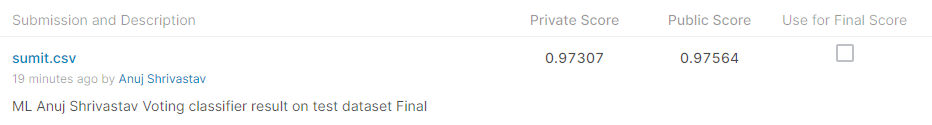

In [170]:
pickle.dump(voting,open("./voting.pkl",'wb'))

In [171]:
from prettytable import PrettyTable
  
# Specify the Column Names while initializing the Table
myTable = PrettyTable([ "Vectorizer","Model", "Accuracy on test Data","Precision on Test Data"])
  
# Add rows
myTable.add_row(["tfidf Vectorizer","Gaussian NB", "90.0", "92.1"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","Decision Tree", "95.2", "93.5"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","Logistic Regression", "98.2", "97.6"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","XGboost", "97.9", "96.2"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","light GBM", "98.5", "97.1"])
myTable.add_row(["-------", "-------", "-------","-------"])
myTable.add_row(["tfidf Vectorizer","Voting classifier", "98.6", "97.3"])
               
print(myTable)

+------------------+---------------------+-----------------------+------------------------+
|    Vectorizer    |        Model        | Accuracy on test Data | Precision on Test Data |
+------------------+---------------------+-----------------------+------------------------+
| tfidf Vectorizer |     Gaussian NB     |          90.0         |          92.1          |
|     -------      |       -------       |        -------        |        -------         |
| tfidf Vectorizer |    Decision Tree    |          95.2         |          93.5          |
|     -------      |       -------       |        -------        |        -------         |
| tfidf Vectorizer | Logistic Regression |          98.2         |          97.6          |
|     -------      |       -------       |        -------        |        -------         |
| tfidf Vectorizer |       XGboost       |          97.9         |          96.2          |
|     -------      |       -------       |        -------        |        ------

# observations:-
1. Clearly we can see voting classifier is performed slightly better than lightgbm, xgboost and Logistic regression.

# My Final Kaggle score with my two best models:-


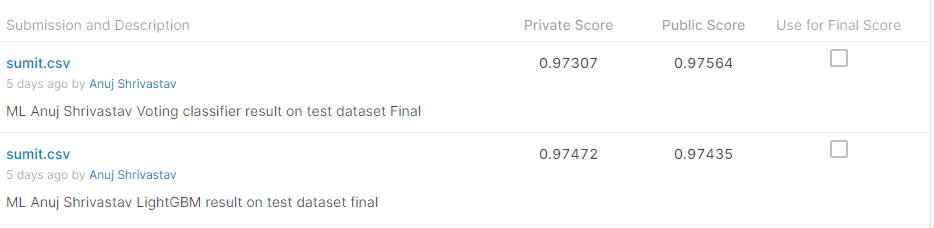

# In both private and public leaderboard i got rank 3 